In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from random import sample
from pylab import *
from scipy import stats
import pandas as pds
from IPython.display import Image
from IPython.display import Latex

%matplotlib inline

# ACP et Basketball

Ce Notebook a pour objet la mise en pratique de l'ACP sur des données de la NBA.

Merci à David Nerin Peña et Thomas Chérion (étudiants en M2 à l'upmc en 2013) pour ce jeu de données créé à partir des statistiques disponibles sur le site www.NBA.com.

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('NTkN2q6sUUk')

Les données étudiées ici s’appuient sur les résultas de quatre équipes lors de la saison régulière 2012-2013. 
Pour chacun des 69 joueurs, les informations que nous avons sont les suivantes :
- Taille (Height)
- Poids (Width) 
- Age (Age)
- Salaire (Salary)
- Equipe (Team)
- Poste occupé (Position)
- Nombre de matchs joués (Games played)
- Nombre de minutes jouées (Minutes)
- Paniers à 2 points réussis (en moyenne durant un match) (Fields goals made)
- Paniers à 2 points tentés (en moyenne durant un match) (Fields goal attempted)
- Pourcentage de paniers à 2 points réussis (en moyenne durant un match) (%Fields goal made)
- Nombre de paniers à 3 points réussis (en moyenne durant un match) (3pts FGM)
- Nombre de paniers à 3 points tentés (en moyenne durant un match) (3pts FGA)
- Pourcentage de paniers à 3 points réussis (en moyenne durant un match) (% 3pts FG)
- Nombre de lancers francs réussis (en moyenne durant un match) (Free throws made)
- Nombre de lancers francs tentés (en moyenne durant un match) (Free throws attempted)
- Pourcentage de lancers francs réussis (en moyenne durant un match) (% FT)
- Nombre de rebonds offensifs (en moyenne durant un match) (Off rebond)
- Nombre de rebonds défensifs (en moyenne durant un match) (Def rebond)
- Nombre total de rebonds (en moyenne durant un match) (Total rebond)
- Nombre de passes décisives (en moyenne durant un match) (Assits)
- Nombre de ballons perdus (en moyenne durant un match) (Turnover)
- Nombre d’interceptions (en moyenne durant un match) (Steals)
- Nombre de blocs tentés (en moyenne durant un match) (Blocks)
- Nombre de blocs réussis (en moyenne durant un match) (Blocked fields goals attempted)
- Fautes subies (en moyenne durant un match) (Personnal fouls)
- Fautes provoquées (en moyenne durant un match) (Personnal fouls drawn)
- FNombre de points marqués (en moyenne durant un match) (Points)
- Différence de score pendant la présence du joueur sur le terrain (en moyenne durant un match) (Point differential of the score)

### Importation des donnees avec pandas

Enregistrer les données NBA_data.txt disponibles à l'adresse http://www.lsta.upmc.fr/ADDA/DataBertrand/NBA_data.txt dans un répertoire sur votre ordinateur.

In [6]:
votre_path= "/Users/bmichel/Dropbox/Enseignements/ADD-M2Stat/Tps-Notebooks/Datasets"

Importation de la base de donnees en utilisant pandas. 
Le module pandas permet de créer et manipuler des tableaux de données (dataframe), de façon similaire à ce que l'on ferait avec le logiciel R.
Prenez quelques minutes pour lire l'introduction à pandas à cette adresse :
http://pandas.pydata.org/pandas-docs/dev/10min.html

In [7]:
data_path = votre_path + "/Basket/NBA_data.txt"
basket_data = pds.read_csv(data_path,header=0)

### Manipulations préliminaires et  statistiques basiques sur les données


L'objet basket_data est de type dataframe pandas. 
Ce type d'objet dipose de quelques fonctionnalites pratiques, par exemple on peut afficher le debut du data frame pandas avec la méthode head():

In [8]:
basket_data.head()

,Players,Height,Weight,Age,Salary,Team,Position,Games played,Minutes,Fields goals made,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
0,Chris Andersen,2.08,111.1,33,341756,Miami_Heat,Center,42,14.9,1.7,...,4.1,0.4,0.6,0.4,1.0,0.3,2.1,2.1,4.9,2.3
1,Chris Bosh,2.11,106.1,28,17545000,Miami_Heat,Center,74,33.2,6.6,...,6.8,1.7,1.7,0.9,1.4,0.6,2.3,3.1,16.6,6.4
2,Dexter Pittman,2.11,139.7,24,854389,Miami_Heat,Center,4,2.9,0.8,...,1.8,0.0,0.5,0.0,0.0,0.3,1.0,0.0,1.5,-2.8
3,Dwyane Wade,1.93,99.8,30,17182000,Miami_Heat,Guard,69,34.6,8.2,...,5.0,5.1,2.8,1.9,0.8,0.5,2.0,4.7,21.2,8.3
4,James Jones,2.03,97.5,31,1500000,Miami_Heat,Forward,38,5.8,0.6,...,0.6,0.3,0.1,0.1,0.2,0.0,0.4,0.1,1.6,-0.4


Statistiques de base sur les variables du dataframe :

In [9]:
basket_data.describe()

,Height,Weight,Age,Salary,Games played,Minutes,Fields goals made,Fields goal attempted,% Fields goal made,3pts FGM,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
count,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2.016232,103.239130,28.42029,4412538.057971,51.507246,19.408696,2.889855,6.302899,0.445507,0.637681,...,3.615942,1.630435,1.082609,0.626087,0.447826,0.320290,1.585507,1.513043,7.778261,2.123188
std,0.081531,12.199159,5.21425,5516462.975402,26.805741,10.047486,2.490874,5.047625,0.109162,0.683654,...,2.955833,1.751076,0.781770,0.489794,0.545734,0.284181,0.728470,1.495081,6.844424,3.246226
min,1.830000,79.400000,20.00000,37737.000000,1.000000,2.900000,0.000000,0.400000,0.000000,0.000000,...,0.500000,0.000000,0.100000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,-9.000000
25%,1.960000,95.300000,24.00000,854389.000000,28.000000,10.600000,1.100000,2.700000,0.410000,0.000000,...,1.900000,0.400000,0.600000,0.300000,0.100000,0.100000,1.000000,0.600000,3.000000,-0.100000
50%,2.030000,106.100000,28.00000,2020200.000000,60.000000,18.800000,2.100000,4.500000,0.450000,0.400000,...,2.700000,1.000000,0.800000,0.600000,0.200000,0.300000,1.600000,1.000000,5.300000,1.800000
75%,2.080000,111.100000,32.00000,4060000.000000,75.000000,27.500000,3.800000,8.800000,0.520000,1.100000,...,5.000000,1.900000,1.400000,0.800000,0.700000,0.400000,2.000000,1.600000,10.500000,4.100000
max,2.210000,139.700000,41.00000,19948799.000000,82.000000,38.500000,10.100000,22.200000,0.640000,2.300000,...,18.000000,7.600000,3.500000,1.900000,3.000000,1.300000,3.600000,6.500000,28.700000,9.500000


Affichage des types des variables du dataframe :

In [10]:
basket_data.dtypes

Players                             object
Height                             float64
Weight                             float64
Age                                  int64
Salary                               int64
Team                                object
Position                            object
Games played                         int64
Minutes                            float64
Fields goals made                  float64
Fields goal attempted              float64
% Fields goal made                 float64
3pts FGM                           float64
3pts  FGA                          float64
% 3pts FG                          float64
Free throws made                   float64
Free throws attempted              float64
% FT                               float64
Off rebond                         float64
Def rebond                         float64
Total rebond                       float64
Assits                             float64
Turnover                           float64
Steals     

###Représentation de quelques distributions

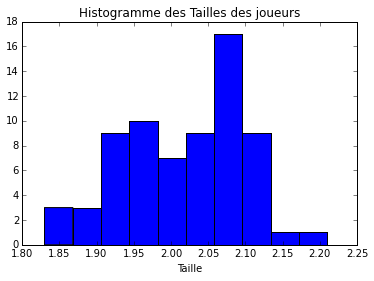

In [12]:
plt.hist(basket_data.Height)
plt.title('Histogramme des Tailles des joueurs')
plt.xlabel('Taille')

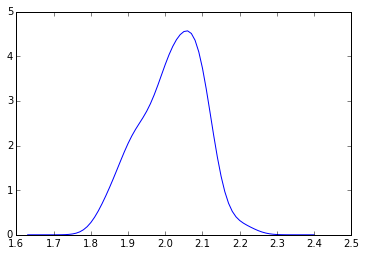

In [13]:
kernel = stats.gaussian_kde(basket_data.Height)
values  = arange(basket_data.Height.min() - 0.2,basket_data.Height.max()+0.2,0.01)
plt.plot(values,kernel(values))


Matrice de correlation pour les variables numériques. Noter que pandas ignore automatiquement les variable non numériques pour le calcul de la corrélation

In [14]:
C =basket_data.corr()
C

,Height,Weight,Age,Salary,Games played,Minutes,Fields goals made,Fields goal attempted,% Fields goal made,3pts FGM,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
Height,1.000000,0.789165,0.139726,0.089870,-0.178166,-0.083436,-0.061235,-0.137941,0.267730,-0.352535,...,0.351069,-0.452204,-0.197387,-0.349926,0.474096,-0.021405,0.179074,-0.016722,-0.087667,-0.054061
Weight,0.789165,1.000000,0.069973,-0.002684,-0.255565,-0.065330,-0.028119,-0.073879,0.291120,-0.351392,...,0.353528,-0.326032,-0.123009,-0.264310,0.345101,-0.017327,0.133244,-0.025983,-0.065088,-0.107380
Age,0.139726,0.069973,1.000000,0.071465,0.002450,0.070946,-0.037032,-0.008763,-0.031513,0.064386,...,0.098409,-0.002710,-0.051934,0.001402,0.055364,-0.094167,0.141391,-0.029576,-0.039257,-0.014746
Salary,0.089870,-0.002684,0.071465,1.000000,0.393312,0.648797,0.772398,0.714154,0.286673,0.271237,...,0.411532,0.572130,0.751695,0.485093,0.320506,0.642918,0.440608,0.826925,0.791237,0.593994
Games played,-0.178166,-0.255565,0.002450,0.393312,1.000000,0.565318,0.485791,0.413650,0.430333,0.472878,...,0.117680,0.466700,0.389269,0.611439,0.245915,0.358087,0.464366,0.419432,0.489186,0.645845
Minutes,-0.083436,-0.065330,0.070946,0.648797,0.565318,1.000000,0.856842,0.880431,0.212392,0.504863,...,0.708914,0.670437,0.793013,0.708414,0.454596,0.543044,0.626424,0.766172,0.854687,0.716355
Fields goals made,-0.061235,-0.028119,-0.037032,0.772398,0.485791,0.856842,1.000000,0.957891,0.353702,0.421051,...,0.566538,0.736157,0.856302,0.648718,0.448671,0.741761,0.509287,0.924944,0.990952,0.741440
Fields goal attempted,-0.137941,-0.073879,-0.008763,0.714154,0.413650,0.880431,0.957891,1.000000,0.158584,0.514337,...,0.612452,0.733672,0.865578,0.617757,0.350478,0.683050,0.448461,0.871676,0.964067,0.617086
% Fields goal made,0.267730,0.291120,-0.031513,0.286673,0.430333,0.212392,0.353702,0.158584,1.000000,-0.116719,...,0.165394,0.138899,0.107806,0.247292,0.355920,0.352832,0.465379,0.310330,0.305559,0.431145
3pts FGM,-0.352535,-0.351392,0.064386,0.271237,0.472878,0.504863,0.421051,0.514337,-0.116719,1.000000,...,0.003774,0.387211,0.347388,0.535016,-0.134580,0.147394,0.204269,0.316328,0.495170,0.350600


<matplotlib.colorbar.Colorbar instance at 0x10a507e60>

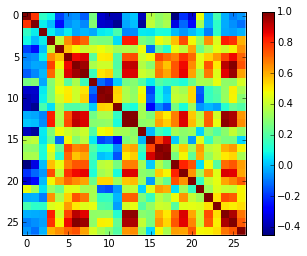

In [15]:
plt.imshow(C, interpolation='none')
plt.colorbar()

### ACP sur les donnees numeriques

L'ACP ne concerne que les variables numériques ; on recherche des variables de type float ou int :

In [16]:
IDnum = [ide for ide in range(30)  if  (basket_data.dtypes[ide] ==  'float64') or (basket_data.dtypes[ide] ==  'int64')]

On extrait  un sous dataframe pandas (syntaxe pandas) :

In [17]:
basket_data_num  = basket_data.iloc[:,IDnum]
type(basket_data_num) 


pandas.core.frame.DataFrame

Recuperation d'un np.array et normalization des données

In [18]:
basket_data_num_nor = preprocessing.scale(basket_data_num.values)


Calcul de l'ACP

In [19]:
pca = PCA(n_components=10)
pca.fit(basket_data_num_nor)
# ratio de la val propre / Inertie totale  (= somme de toutes les valeurs propres) :
pca.explained_variance_ratio_

array([ 0.46394108,  0.16732733,  0.06693234,  0.06462026,  0.03920098,
        0.0339636 ,  0.03163872,  0.02825561,  0.02147498,  0.0179524 ])

Evolution de la variance expliquee le long du spectre. Avec seulement 3 axes on explique près de 70 % de l'inertie

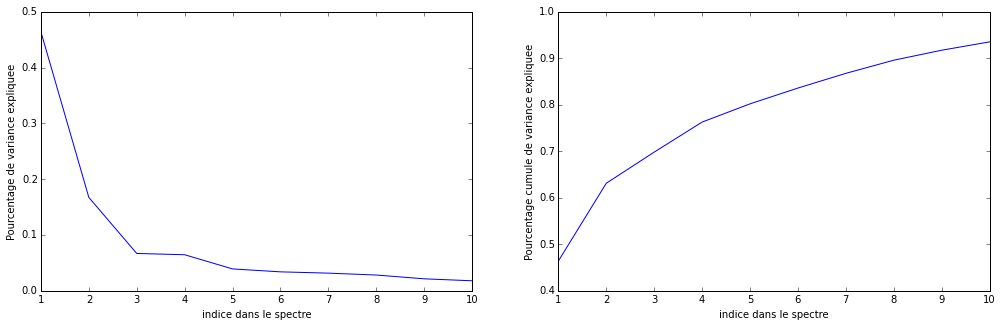

In [20]:
fig = plt.figure(figsize = (17,5))
ax = fig.add_subplot(121)
ax.plot(range(1,11), pca.explained_variance_ratio_)
ax.set_ylabel('Pourcentage de variance expliquee')
ax.set_xlabel('indice dans le spectre')
ax = fig.add_subplot(122)
ax.plot(range(1,11), pca.explained_variance_ratio_.cumsum())
ax.set_ylabel('Pourcentage cumule de variance expliquee')
ax.set_xlabel('indice dans le spectre')

Extraction des trois premieres composantes

In [21]:
pca = PCA(n_components=3)
# calcul les composantes principales 
pca.fit(basket_data_num_nor)
# ajuste ces composantes sur les données 
pcaBasket3 = pca.transform(basket_data_num_nor)
Comp0 = pcaBasket3[:,0]
Comp1 = pcaBasket3[:,1]
Comp2 = pcaBasket3[:,2]

Représentation graphique des 3 premieres composantes

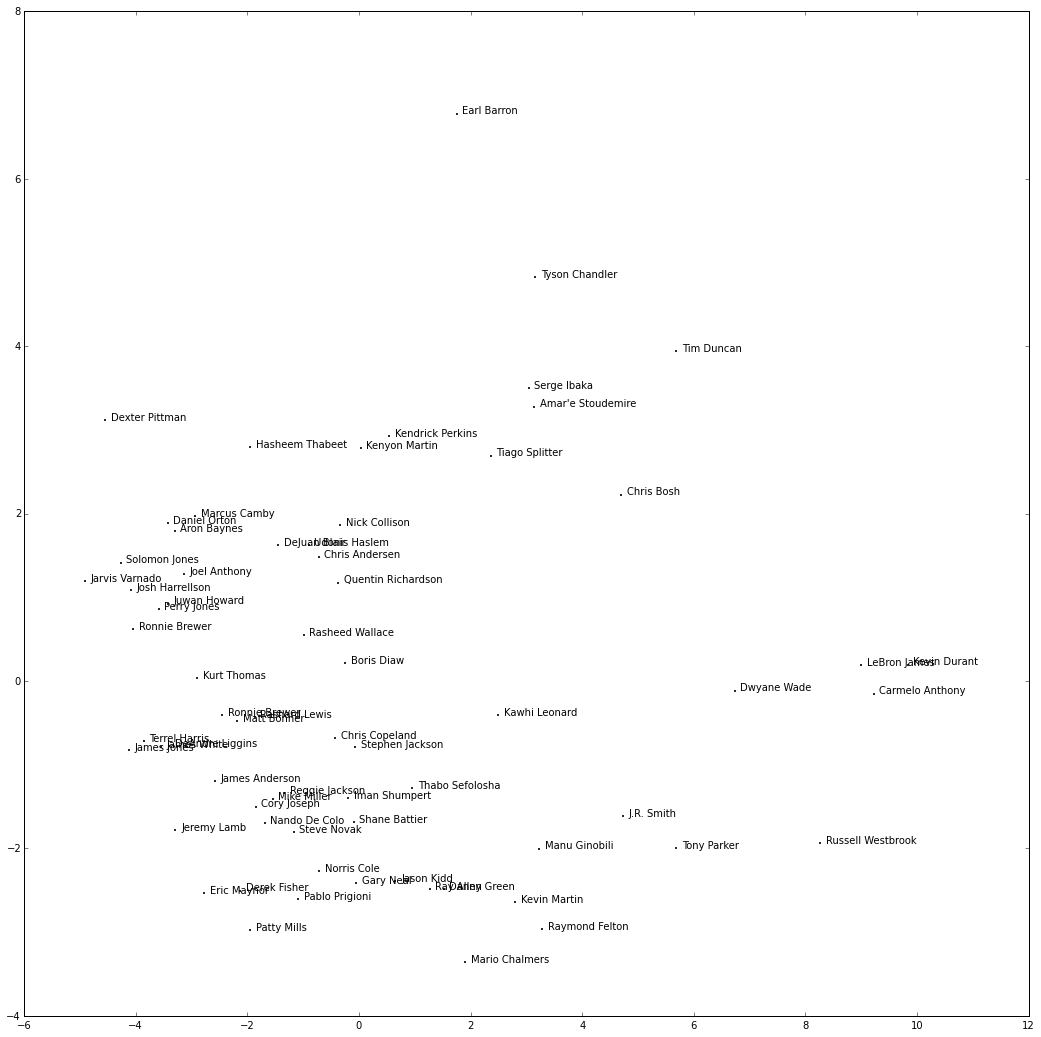

In [22]:
labels = basket_data.values[:,0]
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(111)
ax.scatter(Comp0,Comp1, marker = 'o', s =  1 )
for label, x, y in zip(labels, Comp0,Comp1):
    ax.annotate(label, xy = (x+0.1, y))
plt.show()

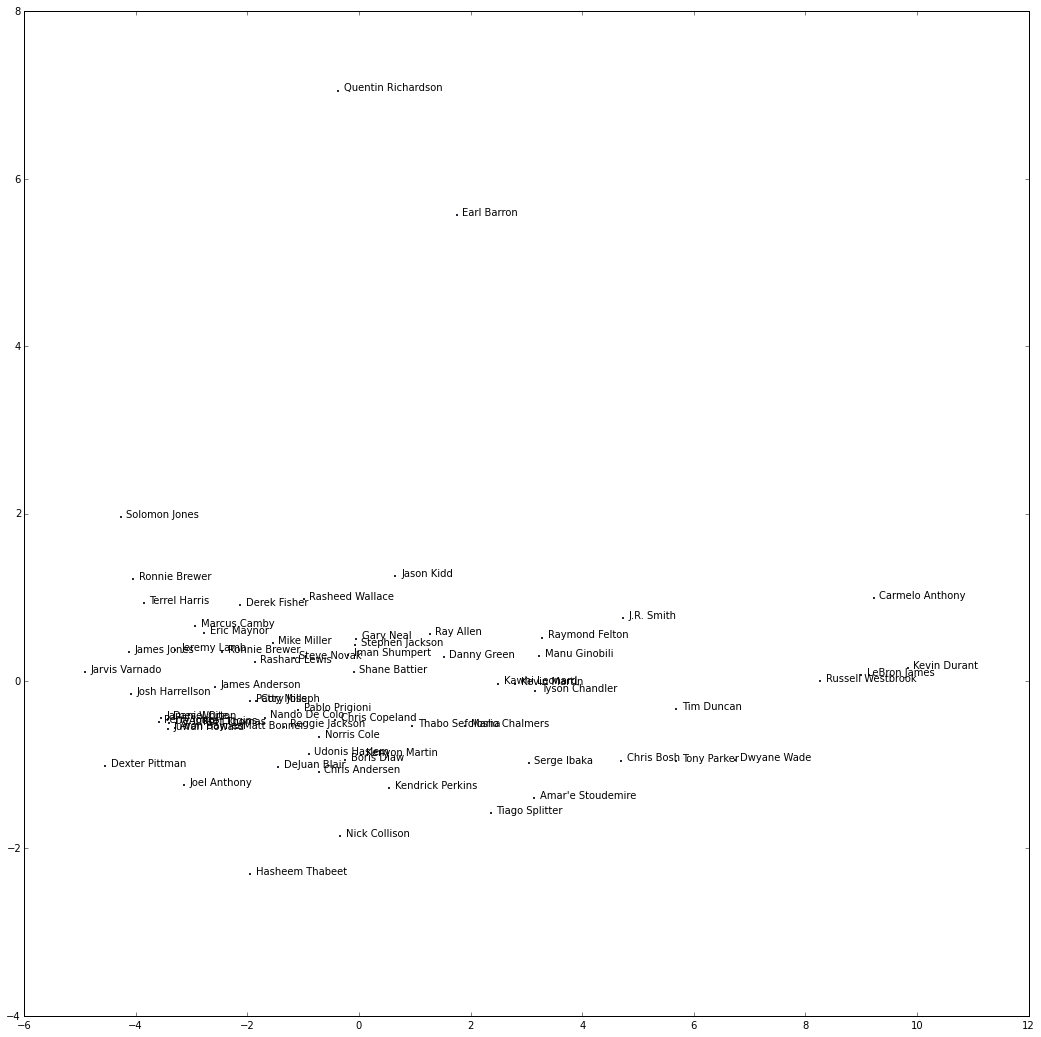

In [23]:
labels = basket_data.values[:,0]
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(111)
ax.scatter(Comp0,Comp2, marker = 'o', s =  1 )
for label, x, y in zip(labels, Comp0,Comp2):
    ax.annotate(label, xy = (x+0.1, y))
plt.show()

Calcul des correlations entre les composantes principales et les variables initiales

In [24]:
A = np.concatenate((pcaBasket3,basket_data_num.values),axis = 1)
CorrCompOld = np.corrcoef(A.T)

Représentation du cercle de correlation pour les deux premières composantes

(-1, 1)

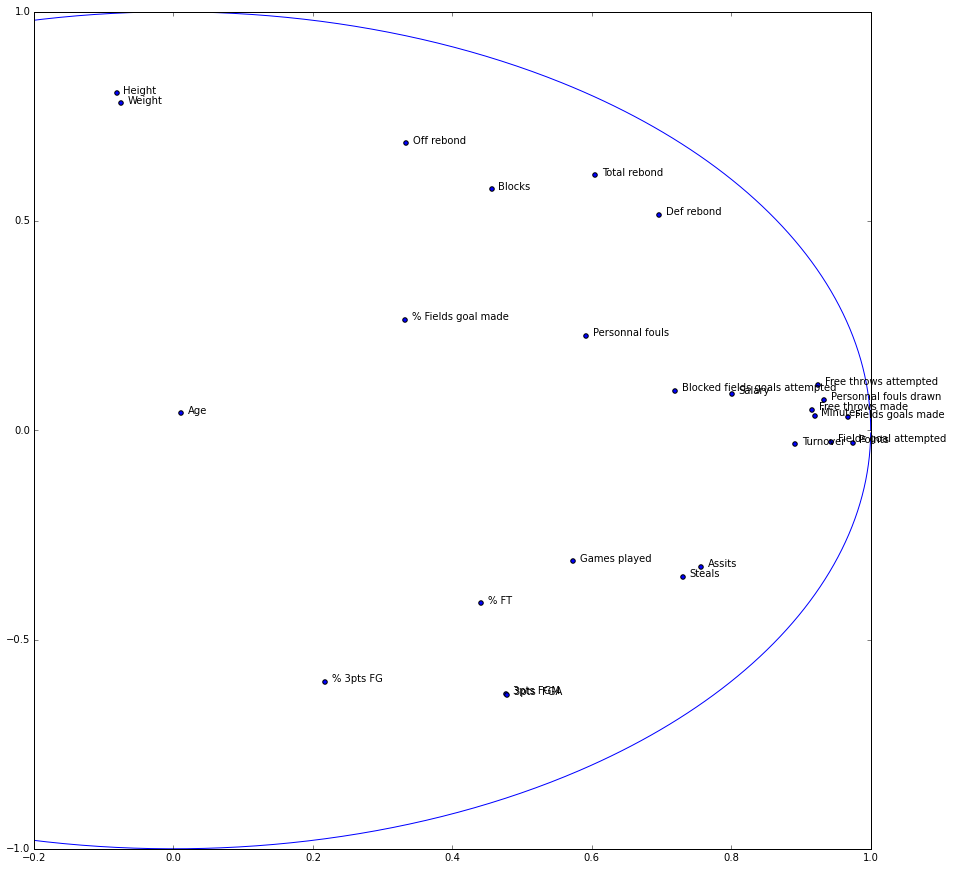

In [25]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.scatter(CorrCompOld[0,3:29],CorrCompOld[1,3:29] )
for label, x, y in zip(basket_data.columns.values[IDnum],CorrCompOld[0,3:29],CorrCompOld[1,3:29]):
    ax.annotate(label, xy = (x+0.01, y))
cx = [ np.cos(u / 1000.0 * 2 * np.pi) for u in range(1000) ]
xy = [ np.sin(u / 1000.0 * 2 * np.pi) for u in range(1000)]
ax.plot(cx,xy)
axes = plt.gca()
axes.set_xlim([-0.2,1])
axes.set_ylim([-1,1])

### Projection sur le premier plan factoriel de la position  des joueurs sur le terrain.

In [26]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/a/ac/Basketball_Positions.png')

In [27]:
Position  = basket_data.Position.values
Iguard  = [i for i in range(len(Position)) if  Position[i] ==  "Guard"]
Icenter  = [i for i in range(len(Position)) if  Position[i] ==  "Center"]
Iforward  = [i for i in range(len(Position)) if  Position[i] ==  "Forward"]

In [28]:
Guard = basket_data_num_nor[Iguard,:].mean(axis = 0)
Center = basket_data_num_nor[Icenter,:].mean(axis = 0)
Forward = basket_data_num_nor[Iforward,:].mean(axis = 0)
pcaGuard = pca.transform(Guard)
pcaCenter = pca.transform(Center)
pcaForward  = pca.transform(Forward)
pcaGuard[0,0]

0.83142693767175924

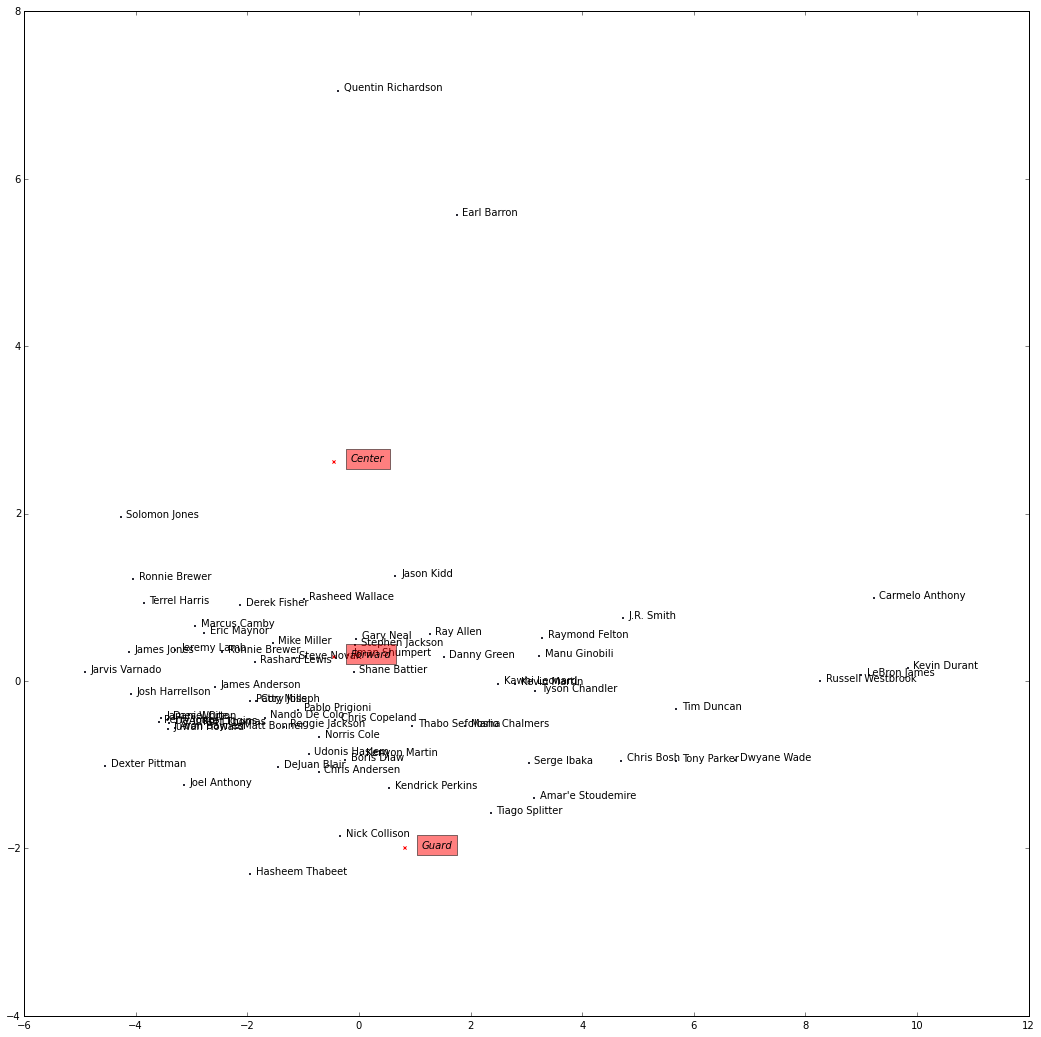

In [29]:
labels = basket_data.values[:,0]
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(111)
ax.scatter(Comp0,Comp2, marker = 'o', s =  1 )
for label, x, y in zip(labels, Comp0,Comp2):
    ax.annotate(label, xy = (x+0.1, y))
ax.scatter(pcaGuard[0,0],pcaGuard[0,1], marker = 'x', s =  10,c= 'r')
ax.text(pcaGuard[0,0]+0.3,pcaGuard[0,1], 'Guard', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
ax.scatter(pcaCenter[0,0],pcaCenter[0,1], marker = 'x', s =  10,c= 'r')
ax.text(pcaCenter[0,0]+0.3,pcaCenter[0,1], 'Center', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
ax.scatter(pcaForward[0,0],pcaForward[0,1], marker = 'x', s =  10,c= 'r')
ax.text(pcaForward[0,0]+0.3,pcaForward[0,1], 'Forward', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.show()